<a href="https://colab.research.google.com/github/RiteshopShrivastava/Customer_Behavior_Analysis/blob/main/Customer_behavoir_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors, and concerns of different types of customers.
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Content**

Attributes

**People**

●	ID: Customer's unique identifier

●	Year_Birth: Customer's birth year

●	Education: Customer's education level

●	Marital_Status: Customer's marital status

●	Income: Customer's yearly household income

●	Kidhome: Number of children in customer's household

●	Teenhome: Number of teenagers in customer's household

●	Dt_Customer: Date of customer's enrollment with the company

●	Recency: Number of days since customer's last purchase

●	Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

●	MntWines: Amount spent on wine in last 2 years

●	MntFruits: Amount spent on fruits in last 2 years

●	MntMeatProducts: Amount spent on meat in last 2 years

●	MntFishProducts: Amount spent on fish in last 2 years

●	MntSweetProducts: Amount spent on sweets in last 2 years

●	MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

●	NumDealsPurchases: Number of purchases made with a discount

●	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

●	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

●	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

●	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

●	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

●	Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

●	NumWebPurchases: Number of purchases made through the company’s web site

●	NumCatalogPurchases: Number of purchases made using a catalogue

●	NumStorePurchases: Number of purchases made directly in stores

●	NumWebVisitsMonth: Number of visits to company’s web site in the last month

**Target - Need to perform clustering to summarize customer segments.**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/marketing_campaign.csv')
print('Total number of data points are:', len(data))

Total number of data points are: 2240


In [ ]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


# **EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Descriptive statistics
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


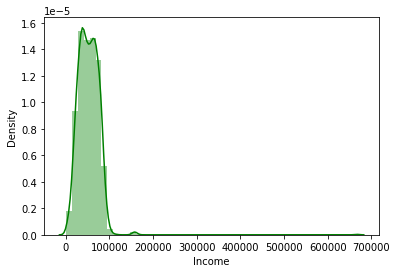

In [ ]:
# Distribution plot for 'Income'
sns.distplot(data['Income'], color='green');

Income is right skewed , Most of the customers Income lies in between 0- 100000 

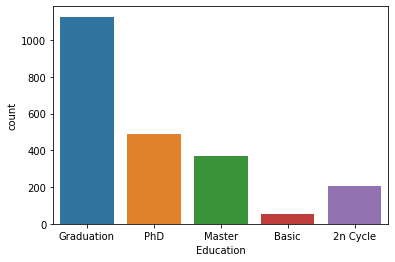

In [ ]:
# Countplot for 'Education'
sns.countplot(x=data['Education']);

Most of the customers are having education as Undergraduate

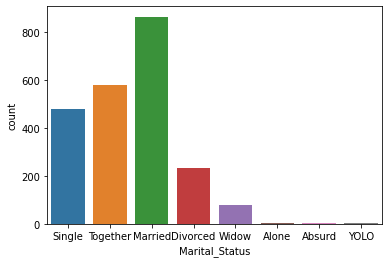

In [ ]:
# Countplot for 'Marital_Status'
sns.countplot(x=data['Marital_Status']);

Customers who are married or living Together are big target

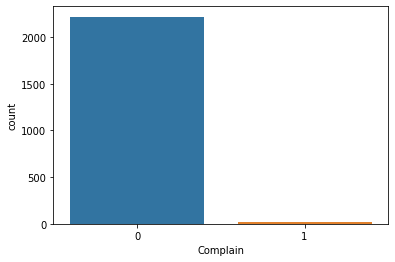

In [ ]:
# Countplot for  'Complain'
sns.countplot(x=data['Complain'])

Very few customers have complain

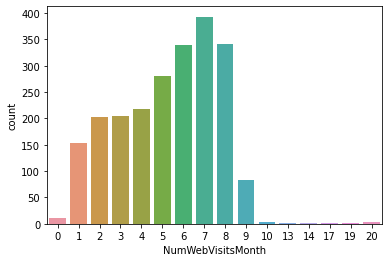

In [ ]:
sns.countplot(x=data['NumWebVisitsMonth'])

Most of the customers visited company website in between 6 to 8 times

**Checking for Null values**

In [ ]:
#'Income' column is having null values
data[data.isnull().any(axis=1)].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0


In [ ]:
# Either we can drop null values or null values can be imputed, here we are droping null values

data= data.dropna()
print('Total number of data points after dropping null values are:', len(data))
data.head()

Total number of data points after dropping null values are: 2216


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


**Cehcking for duplicate rows**

In [ ]:
#Checking for duplicate rows
data[data.duplicated()].shape

(0, 29)

There are no duplicate records

**Changing Datatypes**

In [ ]:
# Some the datatypes are not appropriate,so we will convert it
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

**Checking Categorical features and re-defining categories**

Checking values of 'Education' and 'Marital_Status' column

In [ ]:
print('Different categories in Education are:\n',data['Education'].value_counts(),'\n')

print('Different categories in Marital_Status are:\n', data['Marital_Status'].value_counts())

Different categories in Education are:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 

Different categories in Marital_Status are:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


**For 'Education', we will consider 'Graduation' as 'UnderGraduate' and '2n Cycle' as  'Master'**

In [ ]:
# for 'Education' column, we will consider 'Graduation' as 'UnderGraduate' and '2n Cycle' as  'Master'
data['Education'] = data['Education'].replace({'Graduation':'UnderGraduate','2n Cycle': 'Master'}) 

In [ ]:
data['Education'].value_counts()

UnderGraduate    1116
Master            565
PhD               481
Basic              54
Name: Education, dtype: int64

**Similarly for 'Marital_Status', 'Together' can be termed as 'Married' and 'Divorced', 'Widow','Alone','Absurd', 'YOLO' as 'Single**

In [ ]:
data['Marital_Status'] = data['Marital_Status'].replace({'Together':'Married','Divorced': 'Single', 'Widow': 'Single',
                                                         'Alone': 'Single','Absurd': 'Single', 'YOLO': 'Single'})

In [ ]:
data['Marital_Status'].value_counts()

Married    1430
Single      786
Name: Marital_Status, dtype: int64

# **Feature Engineering**

**Creating some new features from existing features**

Age (Age of customer) - drive from 'Year_Birth'

Children = Kidhome	+ Teenhome

Total_spent= MntWines+MntFruits+MntMeatProducts+MntFishProducts+MntSweetProducts+MntGoldProds

In [ ]:
data['Age']= 2021- data['Year_Birth']
data['Children']= data['Kidhome']+data['Teenhome']
data['Total_spent']= data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data['Total_no_purchase'] = data['NumCatalogPurchases']+data['NumDealsPurchases']+data['NumStorePurchases']+data['NumWebPurchases']

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Total_spent,Total_no_purchase
0,5524,1957,UnderGraduate,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,0,1617,25
1,2174,1954,UnderGraduate,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,2,27,6
2,4141,1965,UnderGraduate,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,0,776,21
3,6182,1984,UnderGraduate,Married,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,1,53,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,1,422,19


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

**Renaming column names**

In [ ]:
data=data.rename(columns={"MntWines": "Spent_Wines","MntFruits":"Spent_Fruits","MntMeatProducts":"Spent_Meat",
                          "MntFishProducts":"Spent_Fish","MntSweetProducts":"Spent_Sweets","MntGoldProds":"Spent_Gold"})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   Spent_Wines          2216 non-null   int64         
 10  Spent_Fruits         2216 non-null   int64         
 11  Spent_Meat           2216 non-null   int64         
 12  Spent_Fish           2216 non-null   int64         
 13  Spent_Sweets         2216 non-nul

**Droping unwanted columns**

Year_Birth, Z_CostContact, Z_Revenue

In [ ]:
data = data.drop(columns=({'Year_Birth','Z_CostContact','Z_Revenue'}))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Education            2216 non-null   object        
 2   Marital_Status       2216 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2216 non-null   int64         
 5   Teenhome             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   datetime64[ns]
 7   Recency              2216 non-null   int64         
 8   Spent_Wines          2216 non-null   int64         
 9   Spent_Fruits         2216 non-null   int64         
 10  Spent_Meat           2216 non-null   int64         
 11  Spent_Fish           2216 non-null   int64         
 12  Spent_Sweets         2216 non-null   int64         
 13  Spent_Gold           2216 non-nul

**Preprocessing - Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Education']= label_encoder.fit_transform(data['Education'])
data['Marital_Status']= label_encoder.fit_transform(data['Marital_Status'])

In [ ]:
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Spent_Wines,Spent_Fruits,Spent_Meat,Spent_Fish,Spent_Sweets,Spent_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spent,Total_no_purchase
0,5524,3,1,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,1617,25
1,2174,3,1,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,27,6
2,4141,3,0,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,776,21
3,6182,3,0,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,53,8
4,5324,2,0,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,422,19


**Outlier Detection**

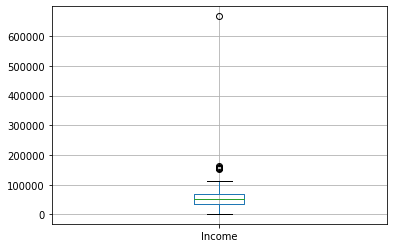

In [ ]:
data.boxplot(column='Income')

Income is having some outliers which are to be treated

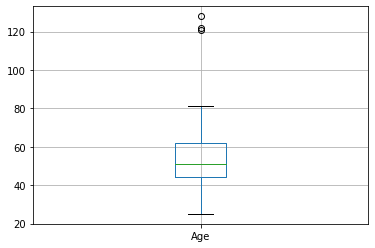

In [ ]:
data.boxplot(column='Age')

Age is having some outliers, Usually age cannot be more 100 years

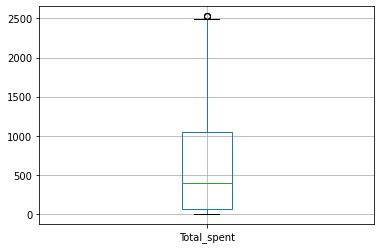

In [ ]:
data.boxplot(column='Total_spent')

Total_spent is also having some outliers